<a href="https://colab.research.google.com/github/ztjfreedom/colab/blob/master/t2t_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the [Tensor2Tensor](https://github.com/tensorflow/tensor2tensor) Colab

Tensor2Tensor, or T2T for short, is a library of deep learning models and datasets designed to make deep learning more accessible and [accelerate ML research](https://research.googleblog.com/2017/06/accelerating-deep-learning-research.html). T2T is actively used and maintained by researchers and engineers within the [Google Brain team](https://research.google.com/teams/brain/) and a community of users. This colab shows you some datasets we have in T2T, how to download and use them, some models we have, how to download pre-trained models and use them, and how to create and train your own models.

In [0]:
#@title
# Copyright 2018 Google LLC.

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

# https://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
# Install deps
!pip install -q -U tensor2tensor
!pip install -q tensorflow matplotlib

     |████████████████████████████████| 1.4MB 6.8MB/s 
     |████████████████████████████████| 143kB 47.7MB/s 
     |████████████████████████████████| 296kB 49.6MB/s 
     |████████████████████████████████| 686kB 48.2MB/s 


In [2]:
# Imports we need.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import collections

from tensor2tensor import models
from tensor2tensor import problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import t2t_model
from tensor2tensor.utils import registry
from tensor2tensor.utils import metrics

# Enable TF Eager execution
tfe = tf.contrib.eager
tfe.enable_eager_execution()

# Other setup
Modes = tf.estimator.ModeKeys

# Setup some directories
data_dir = os.path.expanduser("~/t2t/data")
tmp_dir = os.path.expanduser("~/t2t/tmp")
train_dir = os.path.expanduser("~/t2t/train")
checkpoint_dir = os.path.expanduser("~/t2t/checkpoints")
tf.gfile.MakeDirs(data_dir)
tf.gfile.MakeDirs(tmp_dir)
tf.gfile.MakeDirs(train_dir)
tf.gfile.MakeDirs(checkpoint_dir)
gs_data_dir = "gs://tensor2tensor-data"
gs_ckpt_dir = "gs://tensor2tensor-checkpoints/"

W0704 03:26:05.834980 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/utils/expert_utils.py:68: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0704 03:26:08.537492 140390648178560 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0704 03:26:10.545032 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/utils/adafactor.py:27: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 03:26:10.547025 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/d

# Download MNIST and inspect it

In [3]:
# A Problem is a dataset together with some fixed pre-processing.
# It could be a translation dataset with a specific tokenization,
# or an image dataset with a specific resolution.
#
# There are many problems available in Tensor2Tensor
problems.available()

['algorithmic_addition_binary40',
 'algorithmic_addition_decimal40',
 'algorithmic_cipher_shift200',
 'algorithmic_cipher_shift5',
 'algorithmic_cipher_vigenere200',
 'algorithmic_cipher_vigenere5',
 'algorithmic_identity_binary40',
 'algorithmic_identity_decimal40',
 'algorithmic_math_deepmind_all',
 'algorithmic_math_two_variables',
 'algorithmic_multiplication_binary40',
 'algorithmic_multiplication_decimal40',
 'algorithmic_reverse_binary40',
 'algorithmic_reverse_binary40_test',
 'algorithmic_reverse_decimal40',
 'algorithmic_reverse_nlplike32k',
 'algorithmic_reverse_nlplike8k',
 'algorithmic_shift_decimal40',
 'algorithmic_sort_problem',
 'audio_timit_characters_tune',
 'audio_timit_tokens8k_test',
 'audio_timit_tokens8k_tune',
 'babi_qa_concat_all_tasks_10k',
 'babi_qa_concat_all_tasks_1k',
 'babi_qa_concat_task10_10k',
 'babi_qa_concat_task10_1k',
 'babi_qa_concat_task11_10k',
 'babi_qa_concat_task11_1k',
 'babi_qa_concat_task12_10k',
 'babi_qa_concat_task12_1k',
 'babi_qa_con

In [4]:
# Fetch the MNIST problem
mnist_problem = problems.problem("image_mnist")
# The generate_data method of a problem will download data and process it into
# a standard format ready for training and evaluation.
mnist_problem.generate_data(data_dir, tmp_dir)

W0704 03:27:48.396563 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:226: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0704 03:27:48.399157 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:228: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0704 03:27:48.402331 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:234: The name tf.gfile.Copy is deprecated. Please use tf.io.gfile.copy instead.



W0704 03:27:50.647295 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:242: The name tf.gfile.Rename is deprecated. Please use tf.io.gfile.rename instead.



100% completed
113% completed
100% completed
180% completed


W0704 03:27:52.574687 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:164: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

W0704 03:28:07.991199 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:469: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
W0704 03:28:08.047818 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/generator_utils.py:513: The name tf.gfile.Remove is deprecated. Please use tf.io.gfile.remove instead.



W0704 03:29:18.690994 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/problem.py:680: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
W0704 03:29:18.727181 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/data_generators/image_utils.py:169: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.

W0704 03:29:18.900729 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/image_ops_impl.py:1514: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a fu

Label: 5


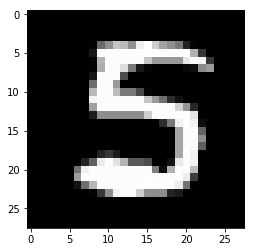

In [5]:
# Now let's see the training MNIST data as Tensors.
mnist_example = tfe.Iterator(mnist_problem.dataset(Modes.TRAIN, data_dir)).next()
image = mnist_example["inputs"]
label = mnist_example["targets"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap('gray'))
print("Label: %d" % label.numpy())

# Translate from English to German with a pre-trained model

In [6]:
# Fetch the problem
ende_problem = problems.problem("translate_ende_wmt32k")

# Copy the vocab file locally so we can encode inputs and decode model outputs
# All vocabs are stored on GCS
vocab_name = "vocab.translate_ende_wmt32k.32768.subwords"
vocab_file = os.path.join(gs_data_dir, vocab_name)
!gsutil cp {vocab_file} {data_dir}

# Get the encoders from the problem
encoders = ende_problem.feature_encoders(data_dir)

# Setup helper functions for encoding and decoding
def encode(input_str, output_str=None):
    """Input str to features dict, ready for inference"""
    inputs = encoders["inputs"].encode(input_str) + [1]  # add EOS id
    batch_inputs = tf.reshape(inputs, [1, -1, 1])  # Make it 3D.
    return {"inputs": batch_inputs}

def decode(integers):
    """List of ints to str"""
    integers = list(np.squeeze(integers))
    if 1 in integers:
        integers = integers[:integers.index(1)]
    return encoders["inputs"].decode(np.squeeze(integers))

Copying gs://tensor2tensor-data/vocab.translate_ende_wmt32k.32768.subwords...
/ [1 files][313.8 KiB/313.8 KiB]                                                
Operation completed over 1 objects/313.8 KiB.                                    


In [0]:
# # Generate and view the data
# # This cell is commented out because WMT data generation can take hours

# ende_problem.generate_data(data_dir, tmp_dir)
# example = tfe.Iterator(ende_problem.dataset(Modes.TRAIN, data_dir)).next()
# inputs = [int(x) for x in example["inputs"].numpy()] # Cast to ints.
# targets = [int(x) for x in example["targets"].numpy()] # Cast to ints.



# # Example inputs as int-tensor.
# print("Inputs, encoded:")
# print(inputs)
# print("Inputs, decoded:")
# # Example inputs as a sentence.
# print(decode(inputs))
# # Example targets as int-tensor.
# print("Targets, encoded:")
# print(targets)
# # Example targets as a sentence.
# print("Targets, decoded:")
# print(decode(targets))

In [7]:
# There are many models available in Tensor2Tensor
registry.list_models()

['aligned',
 'attention_lm',
 'attention_lm_moe',
 'autoencoder_autoregressive',
 'autoencoder_basic',
 'autoencoder_basic_discrete',
 'autoencoder_dual_discrete',
 'autoencoder_ordered_discrete',
 'autoencoder_residual',
 'autoencoder_residual_discrete',
 'autoencoder_residual_vae',
 'autoencoder_stacked',
 'basic_fc_relu',
 'byte_net',
 'cycle_gan',
 'dense_bitwise_categorical_policy',
 'diagonal_neural_gpu',
 'distillation',
 'evolved_transformer',
 'feed_forward_categorical_policy',
 'feed_forward_cnn_small_categorical_policy',
 'feed_forward_cnn_small_categorical_policy_new',
 'gene_expression_conv',
 'glow',
 'imagetransformer',
 'imagetransformer2d',
 'imagetransformer_moe',
 'img2img_transformer',
 'img2img_transformer_block_parallel',
 'lstm_encoder',
 'lstm_seq2seq',
 'lstm_seq2seq_attention',
 'lstm_seq2seq_attention_bidirectional_encoder',
 'lstm_seq2seq_bidirectional_encoder',
 'mtf_bitransformer',
 'mtf_image_transformer',
 'mtf_res_net',
 'mtf_transformer',
 'mtf_unitran

In [8]:
# Create hparams and the model
model_name = "transformer"
hparams_set = "transformer_base"

hparams = trainer_lib.create_hparams(hparams_set, data_dir=data_dir, problem_name="translate_ende_wmt32k")

# NOTE: Only create the model once when restoring from a checkpoint; it's a
# Layer and so subsequent instantiations will have different variable scopes
# that will not match the checkpoint.
translate_model = registry.model(model_name)(hparams, Modes.EVAL)

W0704 03:31:52.557894 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/layers/common_layers.py:94: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 03:31:52.564476 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/utils/t2t_model.py:243: The name tf.summary.text is deprecated. Please use tf.compat.v1.summary.text instead.



In [9]:
# Copy the pretrained checkpoint locally
ckpt_name = "transformer_ende_test"
gs_ckpt = os.path.join(gs_ckpt_dir, ckpt_name)
!gsutil -q cp -R {gs_ckpt} {checkpoint_dir}
ckpt_path = tf.train.latest_checkpoint(os.path.join(checkpoint_dir, ckpt_name))
ckpt_path

u'/root/t2t/checkpoints/transformer_ende_test/model.ckpt-1421000'

In [10]:
# Restore and translate!
def translate(inputs):
    encoded_inputs = encode(inputs)
    with tfe.restore_variables_on_create(ckpt_path):
        model_output = translate_model.infer(encoded_inputs)["outputs"]
    return decode(model_output)

inputs = "The animal didn't cross the street because it was too tired"
outputs = translate(inputs)

print("Inputs: %s" % inputs)
print("Outputs: %s" % outputs)

W0704 03:32:54.120070 140390648178560 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/utils/t2t_model.py:2223: The name tf.get_variable_scope is deprecated. Please use tf.compat.v1.get_variable_scope instead.

W0704 03:32:54.589773 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/layers/common_attention.py:856: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0704 03:32:54.624169 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/utils/expert_utils.py:621: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0704 03:32:54.628876 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor

Inputs: The animal didn't cross the street because it was too tired
Outputs: Das Tier überquerte die Straße nicht, weil es zu müde war, weil es zu müde war.


## Attention Viz Utils

In [0]:
from tensor2tensor.visualization import attention
from tensor2tensor.data_generators import text_encoder

SIZE = 35

def encode_eval(input_str, output_str):
    inputs = tf.reshape(encoders["inputs"].encode(input_str) + [1], [1, -1, 1, 1])  # Make it 3D.
    outputs = tf.reshape(encoders["inputs"].encode(output_str) + [1], [1, -1, 1, 1])  # Make it 3D.
    return {"inputs": inputs, "targets": outputs}

def get_att_mats():
    enc_atts = []
    dec_atts = []
    encdec_atts = []

    for i in range(hparams.num_hidden_layers):
        enc_att = translate_model.attention_weights[
        "transformer/body/encoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
        dec_att = translate_model.attention_weights[
        "transformer/body/decoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
        encdec_att = translate_model.attention_weights[
        "transformer/body/decoder/layer_%i/encdec_attention/multihead_attention/dot_product_attention" % i][0]
        enc_atts.append(resize(enc_att))
        dec_atts.append(resize(dec_att))
        encdec_atts.append(resize(encdec_att))
    return enc_atts, dec_atts, encdec_atts

def resize(np_mat):
    # Sum across heads
    np_mat = np_mat[:, :SIZE, :SIZE]
    row_sums = np.sum(np_mat, axis=0)
    # Normalize
    layer_mat = np_mat / row_sums[np.newaxis, :]
    lsh = layer_mat.shape
    # Add extra dim for viz code to work.
    layer_mat = np.reshape(layer_mat, (1, lsh[0], lsh[1], lsh[2]))
    return layer_mat

def to_tokens(ids):
    ids = np.squeeze(ids)
    subtokenizer = hparams.problem_hparams.vocabulary['targets']
    tokens = []
    for _id in ids:
        if _id == 0:
            tokens.append('<PAD>')
        elif _id == 1:
            tokens.append('<EOS>')
        elif _id == -1:
            tokens.append('<NULL>')
        else:
            tokens.append(subtokenizer._subtoken_id_to_subtoken_string(_id))
    return tokens

In [0]:
def call_html():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

## Display Attention

In [13]:
# Convert inputs and outputs to subwords
inp_text = to_tokens(encoders["inputs"].encode(inputs))
out_text = to_tokens(encoders["inputs"].encode(outputs))

# Run eval to collect attention weights
example = encode_eval(inputs, outputs)
with tfe.restore_variables_on_create(tf.train.latest_checkpoint(checkpoint_dir)):
    translate_model.set_mode(Modes.EVAL)
    translate_model(example)
# Get normalized attention weights for each layer
enc_atts, dec_atts, encdec_atts = get_att_mats()

call_html()
attention.show(inp_text, out_text, enc_atts, dec_atts, encdec_atts)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train a custom model on MNIST

In [0]:
# Create your own model

class MySimpleModel(t2t_model.T2TModel):

    def body(self, features):
        inputs = features["inputs"]
        filters = self.hparams.hidden_size
        h1 = tf.layers.conv2d(inputs, filters,
                              kernel_size=(5, 5), strides=(2, 2))
        h2 = tf.layers.conv2d(tf.nn.relu(h1), filters,
                              kernel_size=(5, 5), strides=(2, 2))
        return tf.layers.conv2d(tf.nn.relu(h2), filters,
                                kernel_size=(3, 3))

hparams = trainer_lib.create_hparams("basic_1", data_dir=data_dir, problem_name="image_mnist")
hparams.hidden_size = 64
model = MySimpleModel(hparams, Modes.TRAIN)

In [0]:
# Prepare for the training loop

# In Eager mode, opt.minimize must be passed a loss function wrapped with
# implicit_value_and_gradients
@tfe.implicit_value_and_gradients
def loss_fn(features):
    _, losses = model(features)
    return losses["training"]

# Setup the training data
BATCH_SIZE = 128
mnist_train_dataset = mnist_problem.dataset(Modes.TRAIN, data_dir)
mnist_train_dataset = mnist_train_dataset.repeat(None).batch(BATCH_SIZE)

optimizer = tf.train.AdamOptimizer()

In [16]:
# Train
NUM_STEPS = 500

for count, example in enumerate(tfe.Iterator(mnist_train_dataset)):
    example["targets"] = tf.reshape(example["targets"], [BATCH_SIZE, 1, 1, 1])  # Make it 4D.
    loss, gv = loss_fn(example)
    optimizer.apply_gradients(gv)

    if count % 50 == 0:
        print("Step: %d, Loss: %.3f" % (count, loss.numpy()))
    if count >= NUM_STEPS:
        break

W0704 03:36:55.095237 140390648178560 deprecation.py:323] From <ipython-input-14-890791e50e66>:8: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0704 03:36:55.176244 140390648178560 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensor2tensor/layers/modalities.py:946: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


Step: 0, Loss: 7.808
Step: 50, Loss: 0.968
Step: 100, Loss: 0.630
Step: 150, Loss: 0.541
Step: 200, Loss: 0.460
Step: 250, Loss: 0.353
Step: 300, Loss: 0.414
Step: 350, Loss: 0.309
Step: 400, Loss: 0.290
Step: 450, Loss: 0.291
Step: 500, Loss: 0.471


In [17]:
model.set_mode(Modes.EVAL)
mnist_eval_dataset = mnist_problem.dataset(Modes.EVAL, data_dir)

# Create eval metric accumulators for accuracy (ACC) and accuracy in
# top 5 (ACC_TOP5)
metrics_accum, metrics_result = metrics.create_eager_metrics(
    [metrics.Metrics.ACC, metrics.Metrics.ACC_TOP5])

for count, example in enumerate(tfe.Iterator(mnist_eval_dataset)):
    if count >= 200:
        break

    # Make the inputs and targets 4D
    example["inputs"] = tf.reshape(example["inputs"], [1, 28, 28, 1])
    example["targets"] = tf.reshape(example["targets"], [1, 1, 1, 1])
  
    # Call the model
    predictions, _ = model(example)
  
    # Compute and accumulate metrics
    metrics_accum(predictions, example["targets"])

# Print out the averaged metric values on the eval data
for name, val in metrics_result().items():
    print("%s: %.2f" % (name, val))

accuracy_top5: 1.00
accuracy: 0.99
